# Install necessary packages

In [1]:
!pip install emd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 8.4 MB/s eta 0:00:00


In [2]:
!pip install neurodsp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.0 MB/s eta 0:00:00


In [3]:
!pip install yasa

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.2/424.2 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.6/423.6 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 3.5 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Created wheel for antropy: filename=antropy-0.1.6-py3-none-any.whl size=16880 sha256=8b68fe744ac81ca693674b43b7a3a2e801e430399e53912573f46eb4d924b8a5
  Stored in directory: /root/.cache/pip/wheels/98/22/06/e91d7bb213c7133d5e2eb34258623e1e19928d5f05e1ee6812
Successful

In [4]:
!pip install pynapple

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 30.7 MB/s eta 0:00:00


# Import necessary libraries

In [54]:
## Initialzing and loading required libraries and subfunctions
import matplotlib.pyplot as plt
import copy
import numpy as np
import yasa
from mne.filter import resample
import pynapple as nap
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
import requests
from io import BytesIO

import scipy
from scipy import signal
from scipy.interpolate import griddata
from scipy.signal import correlate
from scipy.stats import pearsonr
from scipy.fft import fft
from scipy.spatial.distance import euclidean
from scipy.signal import spectrogram
from scipy.io import loadmat
import scipy.fft
import scipy.stats
import scipy.io as sio
from scipy.signal import hilbert

import emd as emd
import emd.sift as sift
import emd.spectra as spectra

from neurodsp.sim import sim_combined
from neurodsp.plts import plot_time_series, plot_timefrequency
from neurodsp.utils import create_times
from neurodsp.timefrequency.wavelets import compute_wavelet_transform
from neurodsp.filt import filter_signal

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
from google.colab import drive
drive.mount('/content/drive/')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive/


# Loading the Dataset

In [11]:
lfp_url = "https://www.dropbox.com/scl/fo/dw1kw8acsna3qponvydwy/h/11/HC/2018-11-02_14-17-36_Post_Trial5/HPC_100_CH32_0.continuous.mat?rlkey=hs1o7bequxipnl1m8eii7eibu&dl=0"
state_url = "https://www.dropbox.com/scl/fo/dw1kw8acsna3qponvydwy/h/11/HC/2018-11-02_14-17-36_Post_Trial5/2018-11-02_14-17-36_post_trial5-states.mat?rlkey=hs1o7bequxipnl1m8eii7eibu&dl=0"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Detecting Phasic and Tonic

In [50]:
def parse_link(data_url, state_url):
    # Check if the URL contains "HPC" or "PFC"
    url = copy.copy(data_url)
    hypno_url = copy.copy(state_url)

    if url[-1] == '0':
      url = url[:-1] + '1'
      print('Data URL GOT ADAPTED!')
    else:
      None

    if hypno_url[-1] == '0':
      hypno_url = hypno_url[:-1] + '1'
      print('STATE URL GOT ADAPTED!')
    else:
      None

    if "HPC" in url:
        print("Data contains HPC.")
        return url, hypno_url
    elif "PFC" in url:
        print("Data contains PFC.")
        return url, hypno_url
    else:
        print("Neither HPC nor PFC found.")
        return None

def extract_frequency_sampling(lfp, hypno):
  len_lfp_2500 = len(lfp) // 60 // 2500
  len_lfp_1000 = len(lfp) // 60 // 1000
  len_hypno = len(hypno) // 60

  if len_hypno ==  len_lfp_2500:
    fs = 2500
    print(f'frequency sampling of the data is: {fs}')
    return fs
  elif len_hypno == len_lfp_1000:
    fs = 1000
    print(f'frequency sampling of the data is: {fs}')
    return fs
  else:
    print('Please specify the frequency sampling of the data in get_data function')

def get_data(lfp_url, state_url):

    data_url, hypno_url = parse_link(lfp_url, state_url)
    data_response = requests.get(data_url)
    data_response.raise_for_status()

    state_response = requests.get(hypno_url)
    state_response.raise_for_status()

    data = scipy.io.loadmat(BytesIO(data_response.content))
    states = scipy.io.loadmat(BytesIO(state_response.content))

    lfp = np.squeeze(data['HPC'])
    hypno = np.squeeze(states['states'])

    fs = extract_frequency_sampling(lfp, hypno)

    unique = np.unique(hypno)
    if unique[0] == 0:
      print('There was 0 in the dataset')
      lfp = lfp[7*fs:-1*fs]
      hypno = hypno[7:-1]
    else:
      None

    return lfp, hypno, fs

def get_sequences(x, ibreak=1):
    """
    Identifies contiguous sequences.

    Parameters:
    x (np.ndarray): 1D time series.
    ibreak (int): A threshold value for determining breaks between sequences (default is 1).

    Returns:
    list of tuples: Each tuple contains the start and end integer of each contiguous sequence.
    """
    if len(x) == 0:
        return []

    diff = np.diff(x)
    breaks = np.where(diff > ibreak)[0]

    # Append the last index to handle the end of the array
    breaks = np.append(breaks, len(x) - 1)

    sequences = []
    start_idx = 0

    for break_idx in breaks:
        end_idx = break_idx
        sequences.append((x[start_idx], x[end_idx]))
        start_idx = end_idx + 1

    return sequences

def get_segments(idx, signal):
    """
    Extracts segments of the signal between specified start and end time indices.

    Parameters:
    idx (list of tuples): Each tuple contains (start_time, end_time).
    signal (np.ndarray): The signal from which to extract segments.

    Returns:
    list of np.ndarray: Each element is a segment of the signal corresponding to the given time ranges.
    """
    segments = []
    for (start_time, end_time) in idx:
        if end_time > len(signal):
            end_time = len(signal) - 1
        segment = signal[start_time:end_time]
        segments.append(segment)

    return segments

def get_tonic(rem_start, rem_end, phasic):
  tonic_seg = []
  current_start = rem_start

  for ph_start, ph_end in phasic:
    # A gap between current start and start of a phasic episode
    if current_start < ph_start:
      tonic_seg.append((current_start, ph_start))

    # Update current start
    current_start = max(current_start, ph_end)

  # After the last phasic episode there might be a remaining tonic episode
  if current_start < rem_end:
    tonic_seg.append((current_start, rem_end))

  return tonic_seg

def get_tonic(rem_start, rem_end, phasic):
  tonic_seg = []
  current_start = rem_start

  for ph_start, ph_end in phasic:
    # A gap between current start and start of a phasic episode
    if current_start < ph_start:
      tonic_seg.append((current_start, ph_start))

    # Update current start
    current_start = max(current_start, ph_end)

  # After the last phasic episode there might be a remaining tonic episode
  if current_start < rem_end:
    tonic_seg.append((current_start, rem_end))

  return tonic_seg

def create_hypnogram(phasicREM, length):
       binary_hypnogram = np.zeros(length, dtype=int)
       for start, end in phasicREM:
           binary_hypnogram[start:end] = 1
       return binary_hypnogram

# bug
def ensure_duration(rem_idx, min_dur):
    for rem_start, rem_end in rem_idx:
      if(rem_end-rem_start) < min_dur:
        #logger.debug("Removing REM epoch: ({0}, {1})".format(rem_start, rem_end))
        rem_idx.remove(rem_idx)

    if len(rem_idx) == 0:
      raise ValueError("No REM epochs greater than min_dur.")
    return rem_idx

def _detect_troughs(signal, thr):
    lidx  = np.where(signal[0:-2] > signal[1:-1])[0]
    ridx  = np.where(signal[1:-1] <= signal[2:])[0]
    thidx = np.where(signal[1:-1] < thr)[0]
    sidx = np.intersect1d(lidx, np.intersect1d(ridx, thidx))+1
    return sidx


def _despine_axes(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

def detect_phasic(eeg, hypno, fs):

    rem_seq = get_sequences(np.where(hypno == 5)[0])

    min_dur = 3
    rem_idx = []
    for start, end in rem_seq:
        if ((end-start) > min_dur):
            rem_idx.append((start * fs, (end+1) * fs))
        if len(rem_idx) == 0:
            raise ValueError("No REM epochs greater than min_dur.")

    # get REM segments
    rem_epochs = get_segments(rem_idx, eeg)

    # Combine the REM indices with the corresponding downsampled segments
    rem = {seq:seg for seq, seg in zip(rem_seq, rem_epochs)}

    w1 = 5.0
    w2 = 12.0
    nfilt = 11
    thr_dur = 900

    trdiff_list = []
    rem_eeg = np.array([])
    eeg_seq = {}
    sdiff_seq = {}
    tridx_seq = {}
    filt = np.ones((nfilt,))
    filt = filt / filt.sum()
    for idx in rem:
        start, end = idx

        epoch = rem[idx]
        epoch = filter_signal(epoch, fs, 'bandpass', (w1,w2), remove_edges=False)
        epoch = hilbert(epoch)

        inst_phase = np.angle(epoch)
        inst_amp = np.abs(epoch)

        # trough indices
        tridx = _detect_troughs(inst_phase, -3)

        # differences between troughs
        trdiff = np.diff(tridx)

        # smoothed trough differences
        sdiff_seq[idx] = np.convolve(trdiff, filt, 'same')

        # dict of trough differences for each REM period
        tridx_seq[idx] = tridx

        eeg_seq[idx] = inst_amp

        # differences between troughs
        trdiff_list += list(trdiff)

        # amplitude of the entire REM sleep
        rem_eeg = np.concatenate((rem_eeg, inst_amp))

    trdiff = np.array(trdiff_list)
    trdiff_sm = np.convolve(trdiff, filt, 'same')

    # potential candidates for phasic REM:
    # the smoothed difference between troughs is less than
    # the 10th percentile:
    thr1 = np.percentile(trdiff_sm, 10)
    # the minimum smoothed difference in the candidate phREM is less than
    # the 5th percentile
    thr2 = np.percentile(trdiff_sm, 5)
    # the peak amplitude is larger than the mean of the amplitude
    # of the REM EEG.
    thr3 = rem_eeg.mean()

    phasicREM = {rem_idx:[] for rem_idx in rem.keys()}

    for rem_idx in tridx_seq:
        rem_start, rem_end = rem_idx
        offset = rem_start * fs

        # trough indices
        tridx = tridx_seq[rem_idx]

        # smoothed trough interval
        sdiff = sdiff_seq[rem_idx]

        # amplitude of the REM epoch
        eegh = eeg_seq[rem_idx]

        # get the candidates for phREM
        cand_idx = np.where(sdiff <= thr1)[0]
        cand = get_sequences(cand_idx)

        for start, end in cand:
            # Duration of the candidate in milliseconds
            dur = ( (tridx[end]-tridx[start]+1)/fs ) * 2500
            if dur < thr_dur:
                continue # Failed Threshold 1

            min_sdiff = np.min(sdiff[start:end])
            if min_sdiff > thr2:
                continue # Failed Threshold 2

            mean_amp =  np.mean(eegh[tridx[start]:tridx[end]+1])
            if mean_amp < thr3:
                continue # Failed Threshold 3

            t_a = tridx[start] + offset
            t_b = np.min((tridx[end] + offset, rem_end * fs))

            ph_idx = (t_a, t_b+1)
            phasicREM[rem_idx].append(ph_idx)

    return phasicREM

def _detect_troughs(signal, thr):
    lidx  = np.where(signal[0:-2] > signal[1:-1])[0]
    ridx  = np.where(signal[1:-1] <= signal[2:])[0]
    thidx = np.where(signal[1:-1] < thr)[0]
    sidx = np.intersect1d(lidx, np.intersect1d(ridx, thidx))+1
    return sidx

def get_start_end(hypno: np.ndarray, sleep_state_id: int):
    """Convert sleep states into lists of start and end time indices."""
    seq = get_sequences(np.where(hypno == sleep_state_id)[0])
    start = []
    end = []
    for s, e in seq:
        start.append(s)
        end.append(e)
    return (start, end)

def _detect_troughs(signal, thr):
    lidx  = np.where(signal[0:-2] > signal[1:-1])[0]
    ridx  = np.where(signal[1:-1] <= signal[2:])[0]
    thidx = np.where(signal[1:-1] < thr)[0]
    sidx = np.intersect1d(lidx, np.intersect1d(ridx, thidx))+1
    return sidx

def preprocess(signal: np.ndarray, n_down: int, target_fs=500) -> np.ndarray:
    """Downsample and remove artifacts."""

    #logger.debug("STARTED: Resampling to 500 Hz.")
    # Downsample to 500 Hz
    data = resample(signal, down=n_down, method='fft', npad='auto')

    #logger.debug("FINISHED: Resampling to 500 Hz.")
    #logger.debug("Resampled: {0} -> {1}.".format(str(signal.shape), str(data.shape)))

    #logger.debug("STARTED: Remove artifacts.")
    # Remove artifacts
    art_std, _ = yasa.art_detect(data, target_fs , window=1, method='std', threshold=4)
    art_up = yasa.hypno_upsample_to_data(art_std, 1, data, target_fs)
    data[art_up] = 0
    #logger.debug("FINISHED: Remove artifacts.")
    data -= data.mean()
    return data


def plot_hypnogram(hypno):
  labels = {1:"Wake", 3:"NREM", 4:"Intermediate", 5:"REM"}
  plt.figure(figsize=(12, 6))
  time = np.arange(len(hypno)) / 60
  plt.step(time, hypno)
  plt.xlabel('Time (m)')
  plt.yticks(list(labels.keys()), list(labels.values()))
  plt.ylabel('States')
  plt.title('Hypnogram of sleep')
  plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
lfpHPC, hypno, fs = get_data(lfp_url, state_url)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Data URL GOT ADAPTED!
STATE URL GOT ADAPTED!
Data contains HPC.
frequency sampling of the data is: 2500


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


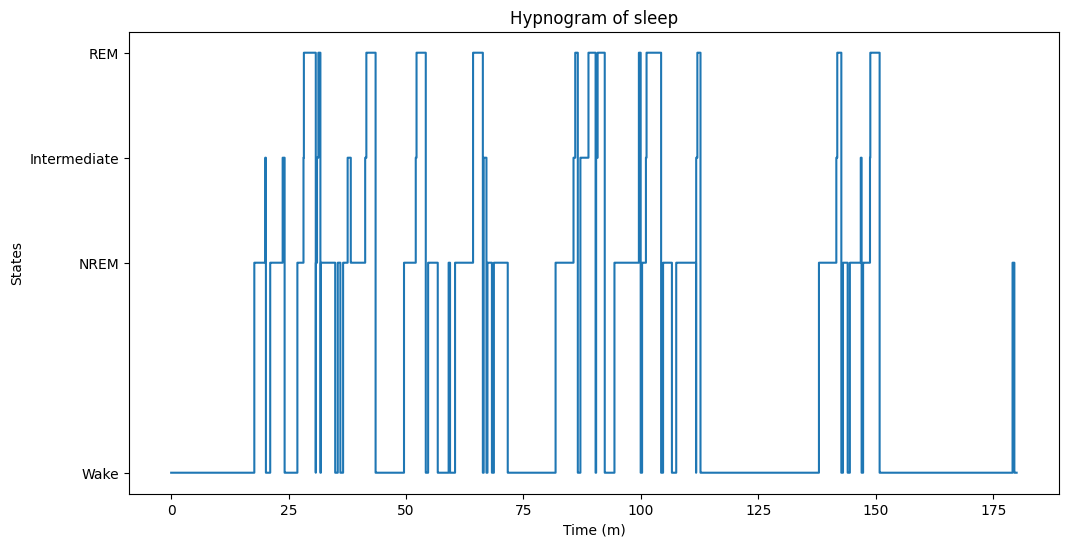

In [43]:
plot_hypnogram(hypno)

In [37]:
targetFs = 500
n_down = fs/targetFs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
start, end = get_start_end(hypno=hypno, sleep_state_id=5)
rem_interval = nap.IntervalSet(start=start, end=end)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
fs = n_down*targetFs
t = np.arange(0, len(lfpHPC)/fs, 1/fs)
lfp = nap.TsdFrame(t=t, d=lfpHPC, columns=['HPC'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
# Detect phasic intervals
lfpHPC_down = preprocess(lfpHPC, n_down)
phREM = detect_phasic(lfpHPC_down, hypno, targetFs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


in pre-process, length of the data after downsampling (len(data)/60/500): 180.01236666666668


In [48]:
# Create phasic REM IntervalSet

start, end = [], []
for rem_idx in phREM:
  for s, e in phREM[rem_idx]:
    start.append(s/targetFs)
    end.append(e/targetFs)
phasic_interval = nap.IntervalSet(start, end)

tonic_interval = rem_interval.set_diff(phasic_interval)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-48-1474cdc04f5d>:8: UserWarning: Some ends precede the relative start. Dropping them!
  phasic_interval = nap.IntervalSet(start, end)


In [52]:
phasic_interval

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


           start     end
0         1782.41  1783.63
1         1783.97   1786
2         1805.24  1805.8
3         1820.9   1821.67
4         1823.8   1825.54
5         1829.39  1830.34
6         1831.21  1833.44
          ...
19        3955.38  3957.52
20        6154.4   6158.26
21        6219.8   6224.91
22        6725.54  6726.48
23        8516.95  8517.37
24        8983.36  8984.42
25        9019.42  9023.14
shape: (26, 2), time unit: sec.

In [53]:
tonic_interval

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


           start     end
0          1696    1782.41
1         1783.63  1783.97
2          1786    1805.24
3         1805.8   1820.9
4         1821.67  1823.8
5         1825.54  1829.39
6         1830.34  1831.21
          ...
32         6722    6725.54
33        6726.48   6761
34         8509    8516.95
35        8517.37   8560
36         8931    8983.36
37        8984.42  9019.42
38        9023.14   9049
shape: (39, 2), time unit: sec.

# EMD Analysis

In [56]:
# Define a simple function to calcuclate the average frequencies of each IMF

def imf_freq(imf,sample_rate,mode='nht'):
  _,IF,_=emd.spectra.frequency_transform(imf,sample_rate,'nht')
  freq_vec=np.mean(IF,axis=0)
  return freq_vec

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
config = emd.sift.SiftConfig.from_yaml_file('/content/drive/My Drive/Donders/Theta-Gamma/emd_masksift_CA1_config_2500.yml')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
def extract_imfs_by_pt_intervals(lfp, fs, interval, config, return_imfs_freqs=False):

  all_imfs = []
  all_imf_freqs = []
  for ii in range(len(interval)):
    start_idx = int(interval.loc[ii, 'start'] * fs)
    end_idx = int(interval.loc[ii, 'end'] * fs)
    sig_part = lfp[start_idx:end_idx]
    sig = np.array(sig_part)

    imf, _ = sift.mask_sift(sig, **config)
    all_imfs.append(imf)

    imf_frequencies = imf_freq(imf, fs)
    all_imf_freqs.append(imf_frequencies)

  if return_imfs_freqs:
    return all_imfs, all_imf_freqs
  else:
    return all_imfs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [88]:
phasic_imfs, imfs_freqs = extract_imfs_by_pt_intervals(lfp, fs, phasic_interval, config, return_imfs_freqs=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[281.56947296 105.91799146  47.58331642  28.01728071  17.5745012
   8.77092375]


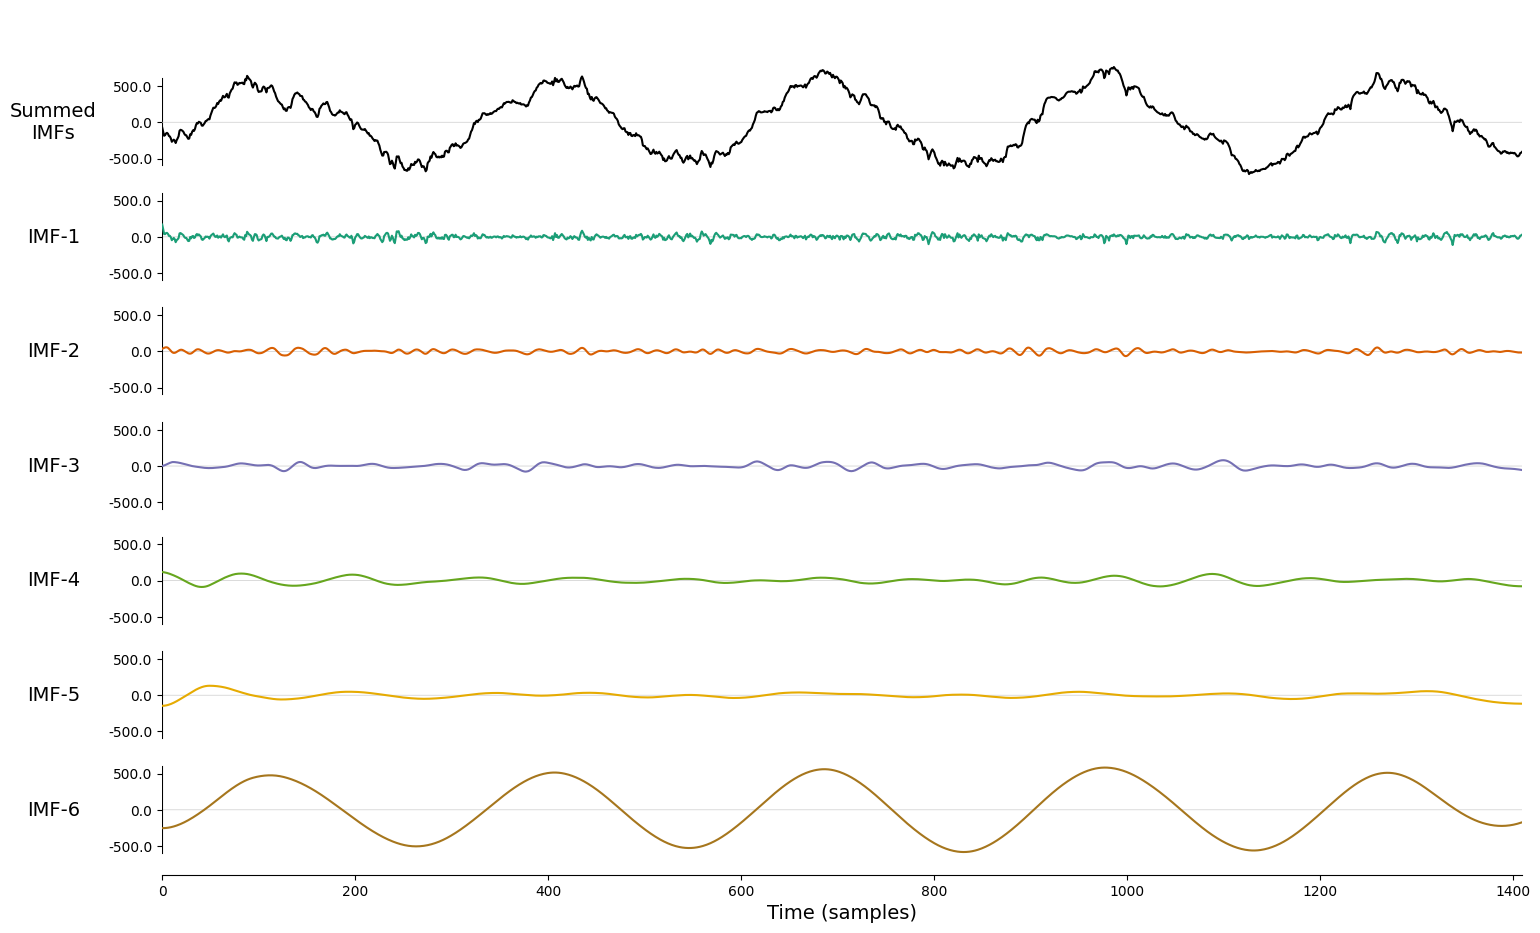

In [90]:
index = 2
maskzcfig=emd.plotting.plot_imfs(phasic_imfs[index]).get_figure()
print(imfs_freqs[index])